## Importing Libraries and Downloading Datasets



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle

!cp drive/MyDrive/kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/cyberbullying-classification

!unzip cyberbullying-classification.zip

 71% 2.00M/2.82M [00:01<00:00, 2.19MB/s]
100% 2.82M/2.82M [00:01<00:00, 2.53MB/s]
Archive:  cyberbullying-classification.zip
  inflating: cyberbullying_tweets.csv  


In [ ]:
!pip install -q git+https://github.com/gmihaila/ml_things.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 4.1 MB/s eta 0:00:00


In [ ]:
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report, accuracy_score

from ml_things import plot_dict, plot_confusion_matrix, fix_text

## Data Loading, TF-IDF, and Splitting

In [ ]:
df = pd.read_csv('/content/cyberbullying_tweets.csv')

counter = Counter(df['cyberbullying_type'].tolist())
labels = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
df = df[df['cyberbullying_type'].map(lambda x: x in labels)]

description_list = df['tweet_text'].tolist()
varietal_list = [labels[i] for i in df['cyberbullying_type'].tolist()]
varietal_list = np.array(varietal_list)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.3)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Multinomial Naive Bayes Classification

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 74.24%
                     precision    recall  f1-score   support

           religion       0.77      0.98      0.86      2398
                age       0.66      0.99      0.79      2471
             gender       0.79      0.87      0.82      2325
          ethnicity       0.86      0.89      0.88      2354
  not_cyberbullying       0.71      0.31      0.43      2434
other_cyberbullying       0.65      0.42      0.51      2326

           accuracy                           0.74     14308
          macro avg       0.74      0.74      0.72     14308
       weighted avg       0.74      0.74      0.71     14308

Normalized confusion matrix


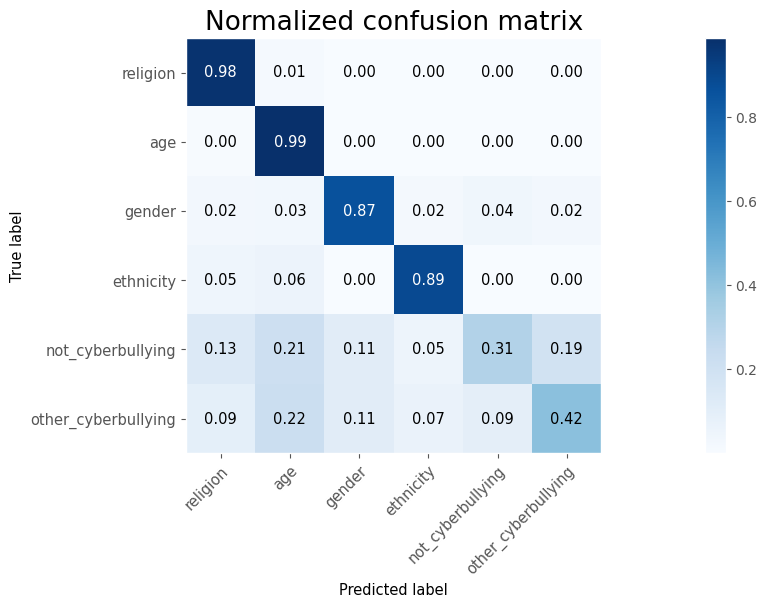

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_x, train_y)
y_score = clf.predict(test_x)

print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))

eval_report = classification_report(test_y, y_score, labels=list(labels.values()), target_names=list(labels.keys()))
print(eval_report) 

plot_confusion_matrix(test_y, y_score, classes=list(labels.keys()), normalize=True, magnify=0.1,);

## Support Vector Classification

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 84.41%
                     precision    recall  f1-score   support

           religion       0.96      0.95      0.96      2398
                age       0.97      0.97      0.97      2471
             gender       0.91      0.86      0.88      2325
          ethnicity       0.98      0.99      0.98      2354
  not_cyberbullying       0.64      0.56      0.60      2434
other_cyberbullying       0.62      0.73      0.67      2326

           accuracy                           0.84     14308
          macro avg       0.85      0.84      0.84     14308
       weighted avg       0.85      0.84      0.84     14308

Normalized confusion matrix


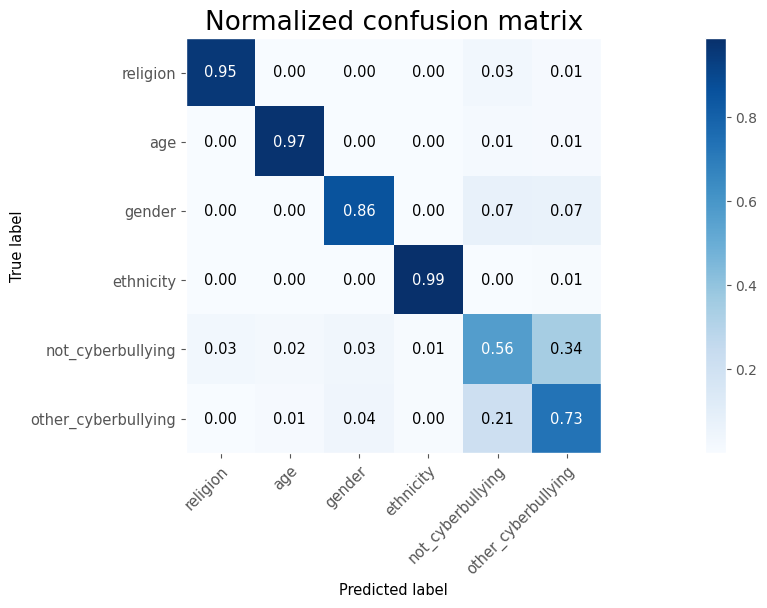

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear').fit(train_x, train_y)
y_score = clf.predict(test_x)

print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))

eval_report = classification_report(test_y, y_score, labels=list(labels.values()), target_names=list(labels.keys()))
print(eval_report)

plot_confusion_matrix(test_y, y_score, classes=list(labels.keys()), normalize=True, magnify=0.1,);

## Random Forest Classification

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 80.99%
                     precision    recall  f1-score   support

           religion       0.95      0.95      0.95      2439
                age       0.95      0.99      0.97      2365
             gender       0.92      0.81      0.86      2370
          ethnicity       0.99      0.97      0.98      2302
  not_cyberbullying       0.54      0.53      0.54      2401
other_cyberbullying       0.56      0.63      0.59      2431

           accuracy                           0.81     14308
          macro avg       0.82      0.81      0.81     14308
       weighted avg       0.82      0.81      0.81     14308

Normalized confusion matrix


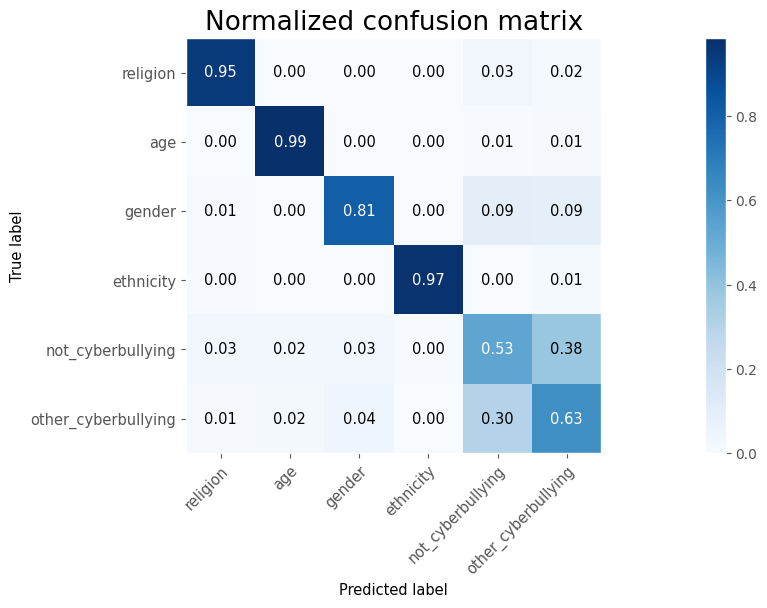

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(train_x, train_y)
y_score = clf.predict(test_x)

print("Accuracy: %.2f%%" % (accuracy_score(test_y, y_score) * 100))

eval_report = classification_report(test_y, y_score, labels=list(labels.values()), target_names=list(labels.keys()))
print(eval_report) 

plot_confusion_matrix(test_y, y_score, classes=list(labels.keys()), normalize=True, magnify=0.1,);

## Tokenization and Vectorization 

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)

class MeanEmbeddingVectorizer():
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(word2vec.values())))

    def transform(self, X):
        return np.array([np.mean([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) for words in X])
    
    def fit(self, X, y):
        return self

df["tokenized"] = [tokenizer.tokenize(i) for i in df['tweet_text']]
model = Word2Vec(df["tokenized"], min_count=1)
w2v = dict(zip(model.wv.index_to_key, model.wv.vectors)) 
modelw = MeanEmbeddingVectorizer(w2v)

df["cyberbullying_type_code"] = df.cyberbullying_type.astype('category').cat.codes
df["cyberbullying_type_code"].unique()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to

array([3, 2, 5, 4, 0, 1], dtype=int8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df["tokenized"],df["cyberbullying_type_code"],test_size=0.2,shuffle=True, stratify=df["cyberbullying_type"], random_state=32)

X_train_vectors_w2v = modelw.transform(X_train)
X_test_vectors_w2v = modelw.transform(X_test)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## XGBoost Classification

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    use_label_encoder=False,
    max_depth=4,
    min_child_weight=2,
    gamma=0.3,
    subsample=0.7,
    colsample_bytree=0.6,
    reg_alpha=0.1,
)
model.fit(X_train_vectors_w2v, y_train)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.7293217318377189
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1598
           1       0.86      0.85      0.85      1592
           2       0.81      0.70      0.75      1595
           3       0.52      0.50      0.51      1589
           4       0.52      0.55      0.53      1565
           5       0.76      0.85      0.80      1600

    accuracy                           0.73      9539
   macro avg       0.73      0.73      0.73      9539
weighted avg       0.73      0.73      0.73      9539

Normalized confusion matrix


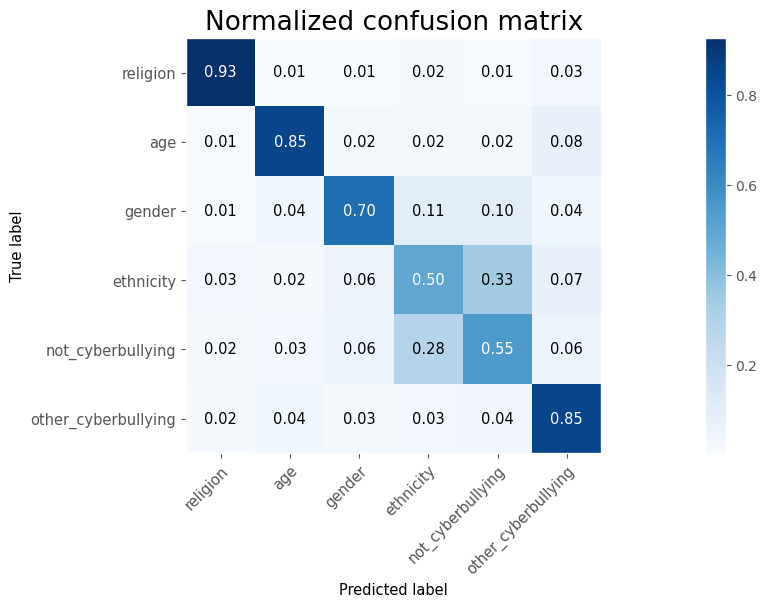

[[0.92553191 0.00876095 0.00563204 0.01689612 0.01188986 0.03128911]
 [0.01130653 0.84673367 0.02386935 0.02072864 0.02135678 0.07600503]
 [0.01253918 0.04012539 0.70407524 0.10532915 0.09968652 0.03824451]
 [0.02769037 0.01510384 0.05726872 0.4965387  0.33291378 0.07048458]
 [0.02492013 0.03258786 0.05686901 0.28115016 0.5456869  0.05878594]
 [0.01625    0.03875    0.025625   0.03125    0.035625   0.8525    ]]


In [ ]:
predictions = model.predict(X_test_vectors_w2v)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))
print(plot_confusion_matrix(y_test, predictions, classes=list(labels.keys()), normalize=True, magnify=0.1))